In [2]:
import pandas as pd
Data = pd.read_table('/content/drive/MyDrive/Tamil DATASET/tam.txt',names=['English','Tamil','Will be dropped'])

In [6]:
Data.shape

(203, 3)

In [5]:
Data.head()

,English,Tamil,Will be dropped
0,I slept.,நான் தூங்கினேன்.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
1,Calm down.,அமைதியாக இருங்கள்,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
2,I'll walk.,நான் நடப்பேன்.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Who is he?,அவன் யார்?,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
4,Who knows?,யாருக்குத் தெரியும்?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [7]:
Data.drop('Will be dropped', inplace=True, axis=1)

In [8]:
Data.head()

,English,Tamil
0,I slept.,நான் தூங்கினேன்.
1,Calm down.,அமைதியாக இருங்கள்
2,I'll walk.,நான் நடப்பேன்.
3,Who is he?,அவன் யார்?
4,Who knows?,யாருக்குத் தெரியும்?


In [9]:
#To lowercase all the character:
Data.English = Data.English.apply(lambda x:x.lower())
Data.Tamil = Data.Tamil.apply(lambda x:x.lower())

In [10]:
#To remove quotes and comma:
import re
Data.English = Data.English.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", 'COMMA', x))
Data.Tamil = Data.Tamil.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", 'COMMA', x))

In [11]:
#To remove special characters
import string
from string import digits
exclude = set (string.punctuation)     #First set special character dictionary
Data.English = Data.English.apply(lambda x:''.join(ch for ch in x if ch not in exclude))
Data.Tamil = Data.Tamil.apply(lambda x:''.join(ch for ch in x if ch not in exclude))

In [12]:
#To Remove all numbers:
Digits = str.maketrans('','', digits)
Data.English = Data.English.apply(lambda x: x.translate(Digits))
Data.Tamil = Data.Tamil.apply(lambda x: x.translate(Digits))

In [13]:
#Remove extra spaces:
Data.English = Data.English.apply(lambda x:x.strip())
Data.Tamil = Data.Tamil.apply(lambda x:x.strip())
Data.English=Data.English.apply(lambda x: re.sub(" +", " ", x))
Data.Tamil=Data.Tamil.apply(lambda x: re.sub(" +", " ", x))

In [14]:
# Add start and end tokens to target sequences
Data.Tamil = Data.Tamil.apply(lambda x : '<sos> '+ x + ' <eos>')

In [15]:
Data.head()

,English,Tamil
0,i slept,<sos> நான் தூங்கினேன் <eos>
1,calm down,<sos> அமைதியாக இருங்கள் <eos>
2,ill walk,<sos> நான் நடப்பேன் <eos>
3,who is he,<sos> அவன் யார் <eos>
4,who knows,<sos> யாருக்குத் தெரியும் <eos>


In [16]:
#To form vocabulary # known as unique vocabulary:
All_ENG_Words = set ()
for ENG in Data.English:
  for word in ENG.split():
    if word not in All_ENG_Words:
      All_ENG_Words.add(word)

All_TAM_Words = set ()
for TAM in Data.Tamil:
  for word in TAM.split():
    if word not in All_TAM_Words:
      All_TAM_Words.add(word)
      
len(All_ENG_Words),len(All_TAM_Words)

(387, 557)

In [17]:
num_encoder_tokens = len(All_ENG_Words)
num_decoder_tokens = len(All_TAM_Words)

In [18]:
#To find maximum length of source sequence:
import numpy as np
length_list=[]
for length in Data.English:
  length_list.append(len(length.split(' ')))
max_length_Source = np.max(length_list)
print('max_input_length: ', max_length_Source)


max_input_length:  19


In [19]:
#To find maximum length of target sentence:
length_list=[]
for length in Data.Tamil:
  length_list.append(len(length.split(' ')))
max_length_Target = np.max(length_list)
print('max_output_length: ', max_length_Target)

max_output_length:  13


In [20]:
# making a list of all input and output words and sorting them out
input_words = sorted(list(All_ENG_Words))
target_words = sorted(list(All_TAM_Words))
#print('all input words: ', input_words)
#print('all output words: ', target_words)

In [21]:
# getting index for words as these indexes will behave as words for machine interactions
input_token_index = dict([(word,i) for i,word in enumerate(input_words)])
output_token_index = dict([(word,i) for i,word in enumerate(target_words)])
print('input token index: ', input_token_index)
print('output token index: ', output_token_index)

input token index:  {'COMMA': 0, 'a': 1, 'able': 2, 'about': 3, 'abroad': 4, 'account': 5, 'afraid': 6, 'after': 7, 'afternoon': 8, 'again': 9, 'ago': 10, 'ahead': 11, 'alive': 12, 'all': 13, 'am': 14, 'and': 15, 'angry': 16, 'answer': 17, 'any': 18, 'anymore': 19, 'anyone': 20, 'anything': 21, 'anywhere': 22, 'apple': 23, 'are': 24, 'arrived': 25, 'asked': 26, 'ate': 27, 'attacked': 28, 'australia': 29, 'aware': 30, 'awayCOMMA': 31, 'back': 32, 'ball': 33, 'be': 34, 'bears': 35, 'beautiful': 36, 'became': 37, 'because': 38, 'been': 39, 'before': 40, 'began': 41, 'begin': 42, 'bell': 43, 'belongs': 44, 'between': 45, 'beware': 46, 'bicycle': 47, 'birthday': 48, 'bit': 49, 'boiled': 50, 'book': 51, 'books': 52, 'bottom': 53, 'bought': 54, 'boy': 55, 'brother': 56, 'burned': 57, 'business': 58, 'by': 59, 'cake': 60, 'calm': 61, 'came': 62, 'can': 63, 'cant': 64, 'cap': 65, 'car': 66, 'cd': 67, 'cds': 68, 'charge': 69, 'church': 70, 'clearly': 71, 'close': 72, 'come': 73, 'contact': 74, '

In [22]:
# creating arrays of input and output data
encoder_input_data = np.zeros((len(Data.English), max_length_Source), dtype='float32')
decoder_input_data = np.zeros((len(Data.Tamil), max_length_Target), dtype='float32')

#one hot encoding the target data as Dense layer only gives one output through softmax layer
decoder_target_data = np.zeros((len(Data.Tamil), max_length_Target, num_decoder_tokens))  

In [23]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(203, 19)
(203, 13)
(203, 13, 557)


In [24]:
# putting all the integer values in input, output data and target data
for i,(input_text, output_text) in enumerate(zip(Data.English, Data.Tamil)):
  for t, word in enumerate(input_text.split()):
# if i = 0>>>>> for first sentence of input_text(English) , Whichever token is there assign its index value from input_token_index at the corresponding places in encoder_input_data
    encoder_input_data[i,t] = input_token_index[word]                    
  for t,word in enumerate(output_text.split()):
    decoder_input_data[i,t] = output_token_index[word]
    # as decoder target data is ahead of decoder input data, it will not include <sos> character(which will be given to decoder model at prediction)
    if t > 0:
      decoder_target_data[i,t-1,output_token_index[word]] = 1

In [25]:
print("encoder input data: ", encoder_input_data[1])
print('decoder input data: ', decoder_input_data[1])
print('decoder target data: ',decoder_target_data[1])
print('shape of sample decoder target data: ', decoder_target_data[1].shape)

encoder input data:  [61. 95.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
decoder input data:  [ 1. 27. 98.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder target data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of sample decoder target data:  (13, 557)


In [26]:
from numpy.random import seed
seed(1)

In [27]:
from keras.layers import Input, Embedding, LSTM, Dense

In [28]:
#Parameters:
embedding_size = 350
Hid_dim = 600                                                  #Hidden State size

In [34]:
                                                                                           #<<<<<Model Building>>>>
#Encoder:
encoder_inputs = Input(shape=(None,))
Enc_Embedding = Embedding(num_encoder_tokens, embedding_size)(encoder_inputs)
encoder = LSTM(Hid_dim, return_state=True)  #Keras provides the return_state argument to the LSTM layer that will provide access to the hidden state output (state_h) and the cell state (state_c)
encoder_outputs, state_h, state_c = encoder(Enc_Embedding)
encoder_states = [state_h, state_c]

#Decoder:
decoder_inputs = Input(shape=(None,))
Dec_Embedding = Embedding(num_decoder_tokens, embedding_size)(decoder_inputs)
decoder = LSTM(Hid_dim, return_sequences=True, return_state=True) 
decoder_outputs, _, _ = decoder(Dec_Embedding, initial_state=encoder_states) # encoder_states = Context Vector      # and _,_ indicates discard states.
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [35]:
from tensorflow.keras.models import Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [36]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 5,229,957
Trainable params: 5,229,957
Non-trainable params: 0
__________________________________________________________________________________________________


In [38]:
r = model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=10, epochs=30, validation_split=0.10)

Epoch 1/30
19/19 [==============================] - 12s 447ms/step - loss: 2.1359 - accuracy: 0.6378 - val_loss: 3.8932 - val_accuracy: 0.4908
Epoch 2/30
19/19 [==============================] - 8s 409ms/step - loss: 1.9167 - accuracy: 0.7168 - val_loss: 4.1700 - val_accuracy: 0.4835
Epoch 3/30
19/19 [==============================] - 8s 407ms/step - loss: 1.8780 - accuracy: 0.7164 - val_loss: 4.3518 - val_accuracy: 0.4762
Epoch 4/30
19/19 [==============================] - 8s 405ms/step - loss: 1.8425 - accuracy: 0.7172 - val_loss: 4.6801 - val_accuracy: 0.4799
Epoch 5/30
19/19 [==============================] - 8s 411ms/step - loss: 1.8207 - accuracy: 0.7194 - val_loss: 4.7283 - val_accuracy: 0.4908
Epoch 6/30
19/19 [==============================] - 8s 403ms/step - loss: 1.7914 - accuracy: 0.7172 - val_loss: 5.0576 - val_accuracy: 0.4799
Epoch 7/30
19/19 [==============================] - 8s 406ms/step - loss: 1.7687 - accuracy: 0.7168 - val_loss: 4.9505 - val_accuracy: 0.4799
Epoch

<function matplotlib.pyplot.show>

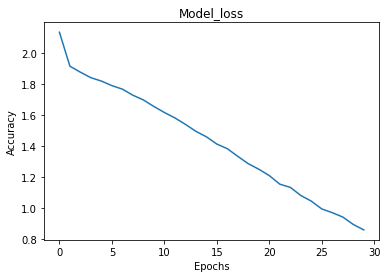

In [39]:
# Now Summarize the history for loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'])
plt.title('Model_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show

<function matplotlib.pyplot.show>

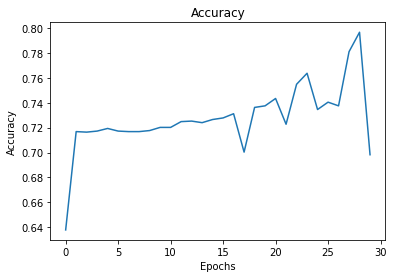

In [40]:
# Now Summarize the history for accuracy
plt.plot(r.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show

In [43]:
                                                                                     #Inference Stage:(Seq2Seq)
#Encoder Model:
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()

#decoder model
decoder_state_input_h = Input(shape=(Hid_dim,))
decoder_state_input_c = Input(shape=(Hid_dim,))
decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]

Final_Embedding = Embedding(num_decoder_tokens, embedding_size)(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder(Final_Embedding, initial_state=decoder_state_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs2] + decoder_states2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2,417,850
Trainable params: 2,417,850
Non-trainable params: 0
_________________________________________________________________


In [44]:
# reversing the word index dictionary to get words from index values
reverse_input_char_index = dict((i,char) for char, i in input_token_index.items())
reverse_output_char_index = dict((i,char) for char, i in output_token_index.items())
print(reverse_input_char_index)
print(reverse_output_char_index)

{0: 'COMMA', 1: 'a', 2: 'able', 3: 'about', 4: 'abroad', 5: 'account', 6: 'afraid', 7: 'after', 8: 'afternoon', 9: 'again', 10: 'ago', 11: 'ahead', 12: 'alive', 13: 'all', 14: 'am', 15: 'and', 16: 'angry', 17: 'answer', 18: 'any', 19: 'anymore', 20: 'anyone', 21: 'anything', 22: 'anywhere', 23: 'apple', 24: 'are', 25: 'arrived', 26: 'asked', 27: 'ate', 28: 'attacked', 29: 'australia', 30: 'aware', 31: 'awayCOMMA', 32: 'back', 33: 'ball', 34: 'be', 35: 'bears', 36: 'beautiful', 37: 'became', 38: 'because', 39: 'been', 40: 'before', 41: 'began', 42: 'begin', 43: 'bell', 44: 'belongs', 45: 'between', 46: 'beware', 47: 'bicycle', 48: 'birthday', 49: 'bit', 50: 'boiled', 51: 'book', 52: 'books', 53: 'bottom', 54: 'bought', 55: 'boy', 56: 'brother', 57: 'burned', 58: 'business', 59: 'by', 60: 'cake', 61: 'calm', 62: 'came', 63: 'can', 64: 'cant', 65: 'cap', 66: 'car', 67: 'cd', 68: 'cds', 69: 'charge', 70: 'church', 71: 'clearly', 72: 'close', 73: 'come', 74: 'contact', 75: 'cop', 76: 'could

In [51]:
# function to predict translation
def decode_seq(input_seq):
  state_values = encoder_model.predict(input_seq)

  target_seq = np.zeros((1,1))

  target_seq[0,0] = output_token_index['<sos>']

  stop_condition = False
  decoded_sentence = ''

  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + state_values)

    sampled_token_index = np.argmax(output_tokens[0,-1,:])
    sampled_char = reverse_output_char_index[sampled_token_index]

    decoded_sentence += ' ' + sampled_char

    if(sampled_char == '<eos>' or len(decoded_sentence) > 52):
      stop_condition = True

    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index

    state_values = [h,c] 

  return decoded_sentence

In [57]:
# testing the model for a sample from existing data
for seq_index in [201]:
  input_seq = encoder_input_data[seq_index:seq_index+1]
  decoded_sentence = decode_seq(input_seq)
  print('----')
  print('Input_sentence: ', Data.English[seq_index:seq_index+1])
  print('decoded sentence: ', decoded_sentence)

----
Input_sentence:  201    if you want your workers to be happyCOMMA you ...
Name: English, dtype: object
decoded sentence:   நான் நான் ஏதாவது <eos>
